# Modelo K-MEANS World Happines

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time                          # To time processes 
import warnings                      # To suppress warnings
import matplotlib.pyplot as plt      # For Graphics
import seaborn as sns
from sklearn import cluster, mixture # For clustering 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#se carga el data set
df_happiness = pd.read_csv('./world-happiness/master.csv')
df_happiness

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587,1
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561,2
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527,3
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522,4
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427,5
...,...,...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,Middle East and Northern Africa,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380,151
761,2019,Rwanda,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334,152
762,2019,Tanzania,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231,153
763,2019,Afghanistan,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203,154


In [4]:
df_happiness.isnull().any()

Year                             False
Country                          False
Region                           False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)     True
Generosity                       False
Happiness Score                  False
Happiness Rank                   False
dtype: bool

In [5]:
#identify the NA value
df_happiness[df_happiness['Trust (Government Corruption)'].isna()]

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
484,2018,United Arab Emirates,Middle East and Northern Africa,2.096,0.776,0.67,0.284,NaN,0.186,6.774,20


In [6]:
#Replace the NaN value with the mean of all values from each year for United Arab Emirates.
df_UAE = df_happiness[df_happiness['Country'] == 'United Arab Emirates']
df_UAE['Trust (Government Corruption)'].mean()  #find mean
# replace the value to mean
df_happiness.fillna(0.311982, inplace=True)
df_happiness.isnull().any()

Year                             False
Country                          False
Region                           False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corruption)    False
Generosity                       False
Happiness Score                  False
Happiness Rank                   False
dtype: bool

In [7]:
df_happiness=df_happiness.rename(columns={'Economy (GDP per Capita)':'Economy_GDP_Per_Capita','Health (Life Expectancy)':'Health_Life_Expectancy','Trust (Government Corruption)':'Trust_Government_Corruption','Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score'})
df_happiness.columns

Index(['Year', 'Country', 'Region', 'Economy_GDP_Per_Capita', 'Family',
       'Health_Life_Expectancy', 'Freedom', 'Trust_Government_Corruption',
       'Generosity', 'Happiness_Score', 'Happiness_Rank'],
      dtype='object')

### **Scaling dataset y función codo**

In [53]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans

wh1 = df_happiness[['Happiness_Score','Economy_GDP_Per_Capita','Family','Health_Life_Expectancy', 'Freedom', 
          'Generosity','Trust_Government_Corruption']] #Subsetting the data
#Scaling of data
ss = StandardScaler()
ss.fit_transform(wh1)

array([[-2.27747856, -1.76952966, -2.88264531, ..., -0.30435198,
        -0.42134033, -0.17443032],
       [-2.21864266, -2.24998392, -2.03657341, ..., -1.9097787 ,
        -0.17396144, -0.23731841],
       [-2.21864266, -2.11828013, -2.59296564, ..., -2.40113598,
        -0.12823777, -0.29776242],
       ...,
       [ 1.91056828,  1.72811966,  1.39056224, ...,  1.46331131,
         1.16398181,  1.78698093],
       [ 1.99525616,  0.95428672,  1.56987245, ...,  1.76071893,
        -0.13554706,  2.51114496],
       [ 1.95514077,  1.1816441 ,  0.82630919, ...,  1.6600331 ,
         0.63420248,  2.76288533]])

In [36]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [55]:
clust_labels, cent = doKmeans(wh1, 4)
dfkmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'dfkmeans',dfkmeans)

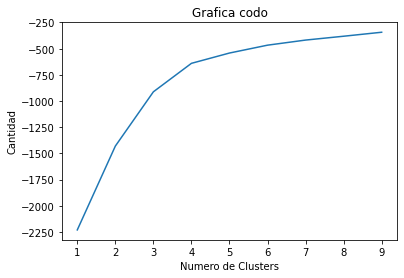

In [56]:
X = np.array(wh1)
NumberClusters = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in NumberClusters]
kmeans
cantidad = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
cantidad
plt.plot(NumberClusters,cantidad)
plt.xlabel('Numero de Clusters')
plt.ylabel('Cantidad')
plt.title('Grafica codo')
plt.show()

### Graficando

In [62]:
# la data se normaliza
df=df_happiness.drop(['Country','Region'],axis=1)
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled

,Year,Economy_GDP_Per_Capita,Family,Health_Life_Expectancy,Freedom,Trust_Government_Corruption,Generosity,Happiness_Score,Happiness_Rank
0,0.996939,0.000103,0.000069,0.000141,0.000180,0.000053,0.000083,0.001405,0.078172
1,0.996977,0.000008,0.000206,0.000111,0.000059,0.000050,0.000098,0.001437,0.077680
2,0.996980,0.000034,0.000116,0.000078,0.000021,0.000047,0.000100,0.001437,0.077642
3,0.997015,0.000328,0.000235,0.000357,0.000078,0.000094,0.000233,0.001487,0.077188
4,0.997024,0.000045,0.000310,0.000072,0.000032,0.000038,0.000074,0.001435,0.077074
...,...,...,...,...,...,...,...,...,...
760,0.999992,0.000715,0.000577,0.000394,0.000287,0.000220,0.000179,0.003733,0.000496
761,0.999992,0.000664,0.000786,0.000488,0.000295,0.000195,0.000076,0.003848,0.000495
762,0.999992,0.000801,0.000760,0.000395,0.000315,0.000157,0.000179,0.003737,0.000496
763,0.999992,0.000647,0.000789,0.000433,0.000337,0.000195,0.000100,0.003782,0.000496


**Según Happiness Score**

[[0.00056149 0.00297696]
 [0.00022572 0.0019657 ]
 [0.00068156 0.00352384]
 [0.00041864 0.00248111]]


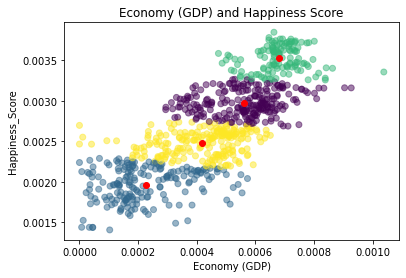

In [70]:
X = data_scaled[["Economy_GDP_Per_Capita","Happiness_Score"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Economy_GDP_Per_Capita'], X['Happiness_Score'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Economy (GDP) and Happiness Score")
plt.xlabel("Economy (GDP)")
plt.ylabel("Happiness_Score")
plt.show()

_Los países más dispersos son aquellos cuyo Happiness_Score es bajo. Esta gráfica demuestra que entre mayor GDP, mayor similitud hay entre el Happines_Score, el cuál será alto_

[[0.00061491 0.00295714]
 [0.00036641 0.00190604]
 [0.00066038 0.00351362]
 [0.00049706 0.00242766]]


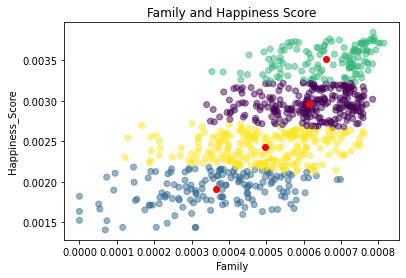

In [71]:
X = data_scaled[["Family","Happiness_Score"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Family'], X['Happiness_Score'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Family and Happiness Score")
plt.xlabel("Family")
plt.ylabel("Happiness_Score")
plt.show()

_Los países más dispersos son aquellos cuyo Happiness_Score y apoyo familiar (Family) es bajo._

[[0.00042758 0.00351782]
 [0.00029001 0.00248357]
 [0.00017086 0.00195616]
 [0.00036341 0.00298045]]


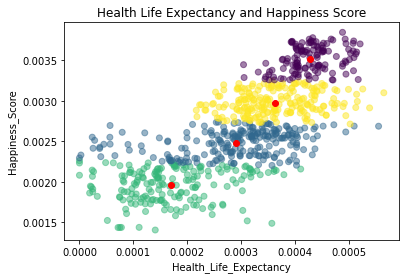

In [72]:
X = data_scaled[["Health_Life_Expectancy","Happiness_Score"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Health_Life_Expectancy'], X['Happiness_Score'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Health Life Expectancy and Happiness Score")
plt.xlabel("Health_Life_Expectancy")
plt.ylabel("Happiness_Score")
plt.show()

_Los países con menos dispesión son aquellos cuya expectativa de vida y Happiness_Score es alto_

[[4.48038060e-05 2.47632031e-03]
 [5.02498848e-05 2.97594078e-03]
 [5.23818856e-05 1.94959562e-03]
 [1.27581088e-04 3.51574665e-03]]


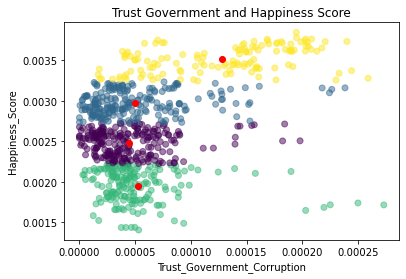

In [73]:
X = data_scaled[["Trust_Government_Corruption","Happiness_Score"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Trust_Government_Corruption'], X['Happiness_Score'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Trust Government and Happiness Score")
plt.xlabel("Trust_Government_Corruption")
plt.ylabel("Happiness_Score")
plt.show()

_En esta gráfica la mayoría de grupos tiene poca dispersión, pero hay más datos atípicos que en las anteriores. Esto se debe a la poca correlación entre Trust_Government_Corruption y Happiness_Score_

**Según Healthy Life Expectancy**

[[0.00014405 0.00013447]
 [0.00051606 0.00033859]
 [0.00034287 0.0002444 ]
 [0.00068609 0.00042896]]


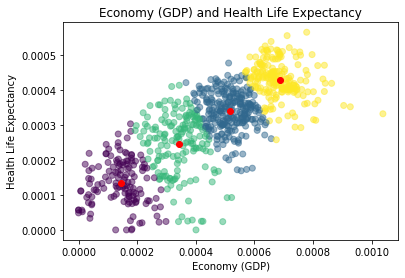

In [74]:
X = data_scaled[["Economy_GDP_Per_Capita","Health_Life_Expectancy"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Economy_GDP_Per_Capita'], X['Health_Life_Expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Economy (GDP) and Health Life Expectancy")
plt.xlabel("Economy (GDP)")
plt.ylabel("Health Life Expectancy")
plt.show()

_En esta gráfica se presentan pocos datos atípicos y poca dispersión. Probablemente por la alta correlaciónentre las variables seleccionadas_

[[0.00047891 0.0003427 ]
 [0.00068348 0.00038943]
 [0.00049718 0.00014534]
 [0.00024548 0.00017552]]


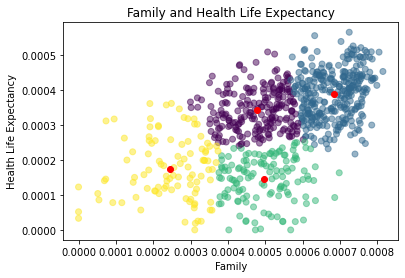

In [75]:
X = data_scaled[["Family","Health_Life_Expectancy"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Family'], X['Health_Life_Expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Family and Health Life Expectancy")
plt.xlabel("Family")
plt.ylabel("Health Life Expectancy")
plt.show()

_En los países con menores Family Support y Expectativa de vida los daotos están más dipsersos, posiblemente porque estás variables no están fuertemente relacionadas entre sí_

[[0.00191847 0.00016557]
 [0.00295976 0.00036383]
 [0.00243755 0.00027545]
 [0.00351575 0.00042705]]


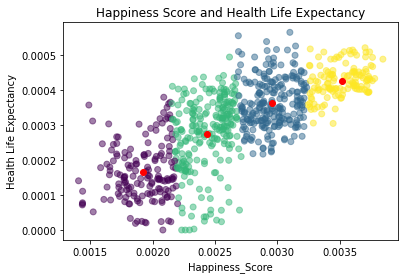

In [76]:
X = data_scaled[["Happiness_Score","Health_Life_Expectancy"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Happiness_Score'], X['Health_Life_Expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Happiness Score and Health Life Expectancy")
plt.xlabel("Happiness_Score")
plt.ylabel("Health Life Expectancy")
plt.show()

_En los países con menores Happiness_Score y Expectativa de vida existe más dispersión entre los datos, así como datos atípicos_

[[3.94793004e-05 4.05847018e-04]
 [5.26618915e-05 1.24792453e-04]
 [1.66611997e-04 4.36891389e-04]
 [4.86519334e-05 2.91091020e-04]]


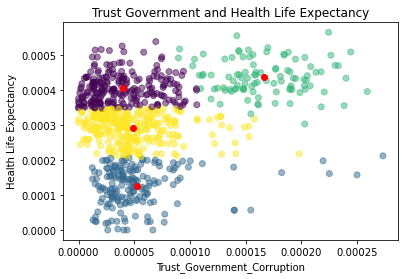

In [78]:
X = data_scaled[["Trust_Government_Corruption","Health_Life_Expectancy"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Trust_Government_Corruption'], X['Health_Life_Expectancy'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Trust Government and Health Life Expectancy")
plt.xlabel("Trust_Government_Corruption")
plt.ylabel("Health Life Expectancy")
plt.show()

_En esta gráfica no hay mucha variedad de valores en Trust_Government_Corruption. Solo un grupo de países tiene los índices más altos y al mismo tiempo, mayor dispesión e  índices de Expectativa de vida_

**Según Economy GDP Per Capita**

[[0.00248111 0.00041864]
 [0.00352384 0.00068156]
 [0.0019657  0.00022572]
 [0.00297696 0.00056149]]


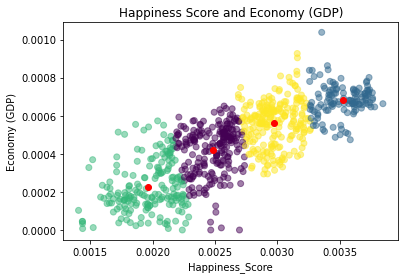

In [86]:
X = data_scaled[["Happiness_Score","Economy_GDP_Per_Capita"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Happiness_Score'], X['Economy_GDP_Per_Capita'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Happiness Score and Economy (GDP)")
plt.xlabel("Happiness_Score")
plt.ylabel("Economy (GDP)")
plt.show()

_Se puede observa que en los países con bajos índices de felicidad y GDP hay más dispersión. Mientras que en los países con altos índices hay poca dispersión y solo un dato atípico._

[[0.00047891 0.0003427 ]
 [0.00068348 0.00038943]
 [0.00024548 0.00017552]
 [0.00049718 0.00014534]]


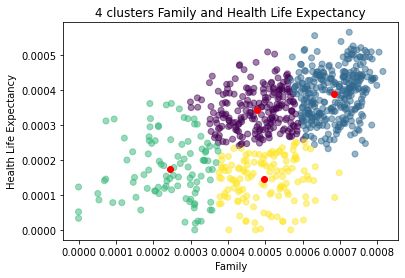

In [69]:
X = data_scaled[["Family","Economy_GDP_Per_Capita"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Family'], X['Economy_GDP_Per_Capita'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Family and Economy (GDP)")
plt.xlabel("Family")
plt.ylabel("Economy (GDP)")
plt.show()

_Se puede ver que entre más apoyo familiar, más expectativa de vida. Sin embargo no se garantiza al 100% porque la dispersión es alto en 2 de los 4 grupos_

[[0.00042671 0.00068254]
 [0.0002376  0.00033468]
 [0.00033571 0.00050749]
 [0.00013326 0.00014193]]


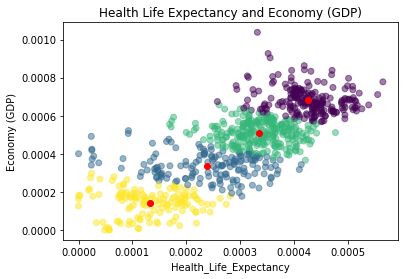

In [83]:
X = data_scaled[["Health_Life_Expectancy","Economy_GDP_Per_Capita"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Health_Life_Expectancy'], X['Economy_GDP_Per_Capita'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Health Life Expectancy and Economy (GDP)")
plt.xlabel("Health_Life_Expectancy")
plt.ylabel("Economy (GDP)")
plt.show()

_En esta gráfica la dispersión no varíua tanto entre los grupos, la mayoría tiene datos atípicos y los clusters están centrados con exactitud_

[[4.53380474e-05 3.66785664e-04]
 [1.34914306e-04 7.11210045e-04]
 [5.76555380e-05 1.47701248e-04]
 [3.80663003e-05 5.52169359e-04]]


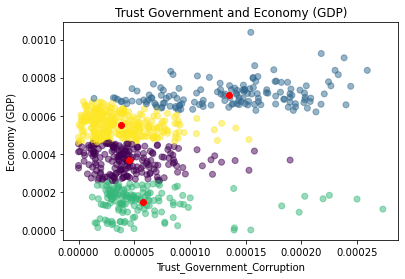

In [82]:
X = data_scaled[["Trust_Government_Corruption","Economy_GDP_Per_Capita"]]

kmeans = KMeans(n_clusters=4).fit(X) # se eligen 4 cluster segun lo encontrado en la función codo
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(X['Trust_Government_Corruption'], X['Economy_GDP_Per_Capita'], c= kmeans.labels_.astype(float), alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')

plt.title("Trust Government and Economy (GDP)")
plt.xlabel("Trust_Government_Corruption")
plt.ylabel("Economy (GDP)")
plt.show()

_En esta gráfica se puede ver una dispersión variable en los países, sobre todo en aquellos con un índice de GDP alto. Es decir que no todos tienen confianza similar aunque su GDP si lo sea o viceversa_